src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [2]:
import tensorflow as tf

2025-03-12 21:09:43.689817: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 21:09:43.872441: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 21:09:44.029193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741810184.171694    3304 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741810184.213986    3304 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 21:09:44.556899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-03-12 21:09:46.995869: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2907 files belonging to 22 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

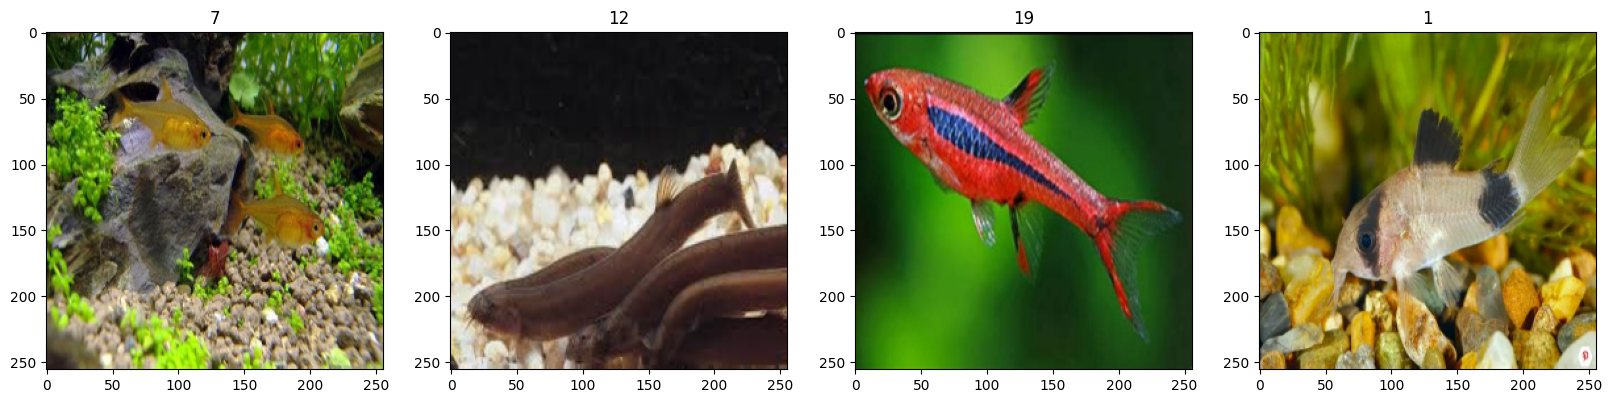

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.7085861 , 0.61839   , 0.41987592],
          [0.71318936, 0.6156863 , 0.40445772],
          [0.70763636, 0.60309434, 0.4       ],
          ...,
          [0.59607846, 0.5137255 , 0.20392157],
          [0.6       , 0.5176471 , 0.20784314],
          [0.6       , 0.5149433 , 0.2132506 ]],
 
         [[0.7085861 , 0.61839   , 0.42116988],
          [0.71318936, 0.61374533, 0.40862438],
          [0.70763636, 0.60216254, 0.4018636 ],
          ...,
          [0.59514666, 0.5169604 , 0.20715643],
          [0.59346515, 0.5152789 , 0.20547497],
          [0.588147  , 0.50869334, 0.20556425]],
 
         [[0.7128753 , 0.61924785, 0.42745864],
          [0.7126833 , 0.610493  , 0.41425112],
          [0.7072527 , 0.600573  , 0.40569782],
          ...,
          [0.59032845, 0.5213494 , 0.21039441],
          [0.58689994, 0.5175372 , 0.20773327],
          [0.57827985, 0.5071428 , 0.2021549 ]],
 
         ...,
 
         [[0.21816789, 0.49853873, 0.06815258],
          [0.16111

# Split Data

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

63

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [15]:
train_images = []
train_labels = []

In [16]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-12 21:09:51.745985: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [18]:
val_images = []
val_labels = []

In [19]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([ 7, 11, 15,  9,  9,  6,  3,  6, 18, 10, 11,  6, 13, 16, 15,  7,  4,
       16,  6,  7, 11, 16, 20,  6, 14,  7, 20, 20, 18, 17,  7, 18],
      dtype=int32), array([11,  9,  7, 12, 14, 16,  4, 11, 18, 15,  5, 14, 12,  9, 16,  9,  4,
       20, 13, 19, 11, 11, 10, 12,  7, 16, 14,  0, 11, 11,  5,  4],
      dtype=int32), array([10, 16,  1,  4, 11,  4, 15,  9, 15, 12, 21, 15, 10,  9, 11,  8, 11,
        9,  8,  7,  7, 15, 17, 12,  9, 16,  0, 15, 14,  9, 15,  7],
      dtype=int32), array([19,  7,  5,  9,  7,  9,  9, 18,  7,  7,  2, 16, 11,  3, 19, 18,  3,
       10,  4,  3,  6, 15,  2, 15, 12, 12, 16,  2, 14, 15, 16,  4],
      dtype=int32), array([13,  6, 16,  6, 17, 12,  4, 19,  5,  7, 12,  5,  9,  7,  0,  5,  6,
       18,  4, 21, 16,  8, 17, 21, 19, 12,  1, 11, 21,  3,  7, 19],
      dtype=int32), array([ 7,  7, 19,  7,  9,  6, 17, 15,  9,  7,  9, 20, 15, 18, 11, 17, 16,
       13, 15, 10,  7,  4, 15, 11, 19,  3,  9,  9,  0,  7,  7, 15],
      dt

2025-03-12 21:09:55.455426: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

/run/media/mad/SATA_SSD/Projekte/Git/Varanasi3DErfassung/AquariumFishRecognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (2016, 256, 256, 3)
train_labels_one_hot shape: (2016, 22)
val_images shape: (576, 256, 256, 3)
val_labels_one_hot shape: (576, 22)


In [27]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 401ms/step - accuracy: 0.1002 - loss: 3.0888 - val_accuracy: 0.2378 - val_loss: 2.5702
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.2862 - loss: 2.4051 - val_accuracy: 0.3507 - val_loss: 2.2884
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 402ms/step - accuracy: 0.4869 - loss: 1.8086 - val_accuracy: 0.4670 - val_loss: 1.8886
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.6648 - loss: 1.1999 - val_accuracy: 0.5122 - val_loss: 1.8424
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.8366 - loss: 0.6291 - val_accuracy: 0.5625 - val_loss: 1.9664
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9157 - loss: 0.3477 - val_accuracy: 0.5816 - val_loss: 2.0464
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.9581 - loss: 0.1640 - val_accuracy: 0.5833 - val_loss: 2.2615
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 387ms/step - accuracy: 0.9708 - loss: 0.1229 - val_accu

# Plot Performance

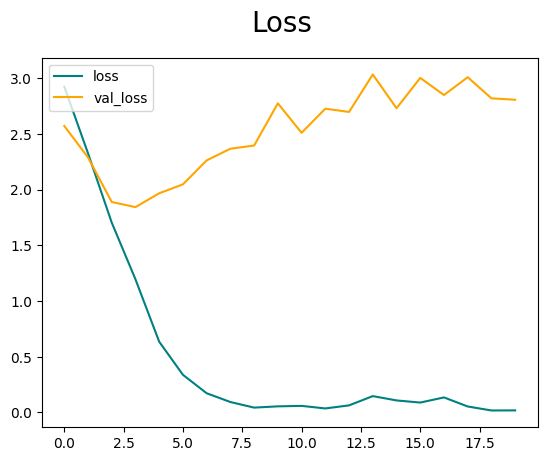

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

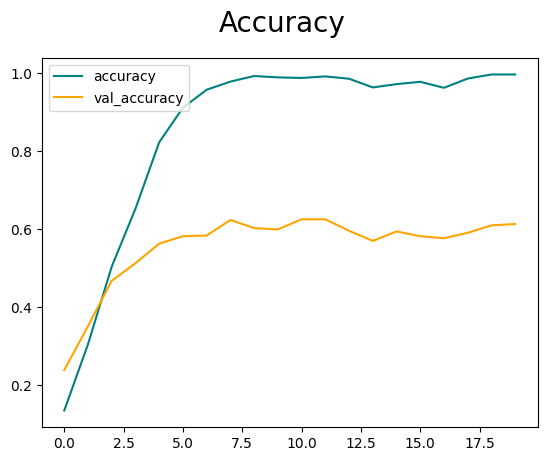

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [36]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Precision: 0.54296875
Recall: 0.4826388955116272
Accuracy: 0.5138888955116272


# Test

In [37]:
import cv2

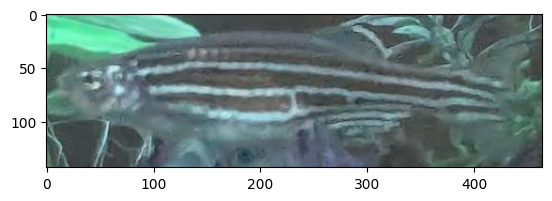

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class is(Danio_rerio): Danio_rerio


In [38]:
img = cv2.imread('test_pictures/Danio_rerio.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Danio_rerio): {class_names[predicted_class]}')

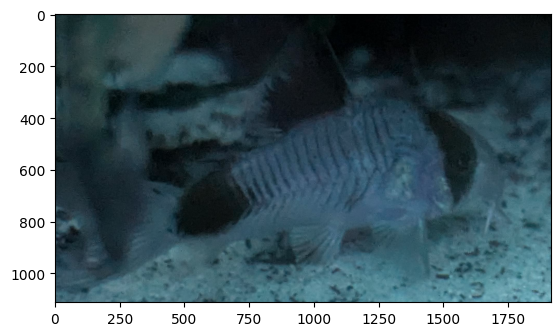

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Corydoras_Panda): Inpaichthys_kerri


In [39]:
img = cv2.imread('test_pictures/Corydoras_Panda.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_Panda): {class_names[predicted_class]}')

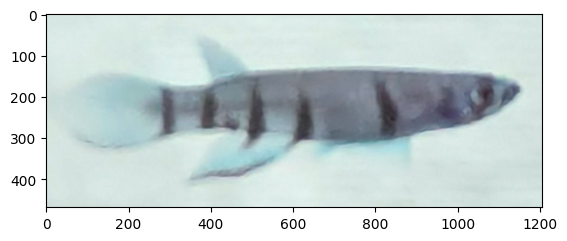

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Epiplatys_dageti): Corydoras_Panda


In [41]:
img = cv2.imread('test_pictures/Epiplatys_dageti.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Epiplatys_dageti): {class_names[predicted_class]}')

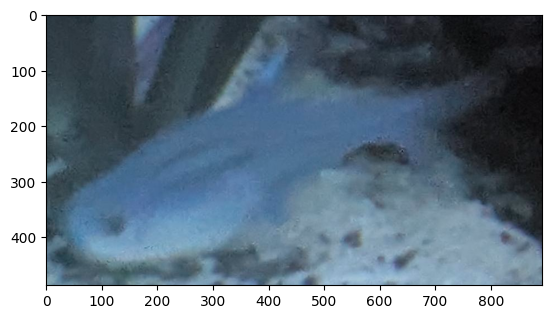

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Hyphessobrycon_amandae): Corydoras_Panda


In [42]:
img = cv2.imread('test_pictures/Hyphessobrycon_amandae.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Hyphessobrycon_amandae): {class_names[predicted_class]}')

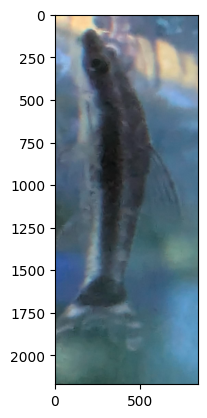

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Otocinclus_affinis): Corydoras_Panda


In [43]:
img = cv2.imread('test_pictures/Otocinclus_affinis.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Otocinclus_affinis): {class_names[predicted_class]}')

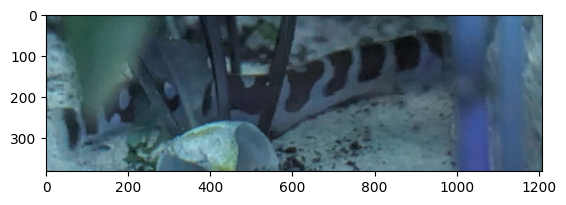

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class is(Pangio_kuhlii): Corydoras_Panda


In [44]:
img = cv2.imread('test_pictures/Pangio_kuhlii.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_kuhlii): {class_names[predicted_class]}')

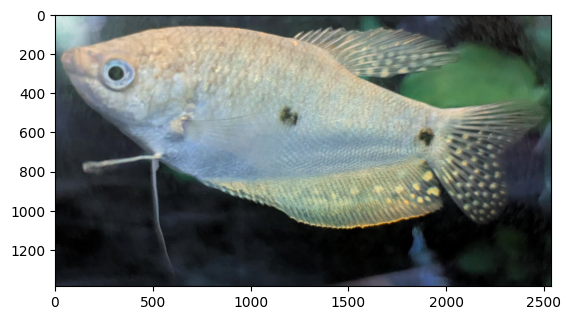

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Trichogaster_trichopterus): Trichogaster_trichopterus


In [45]:
img = cv2.imread('test_pictures/Trichogaster_trichopterus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Trichogaster_trichopterus): {class_names[predicted_class]}')

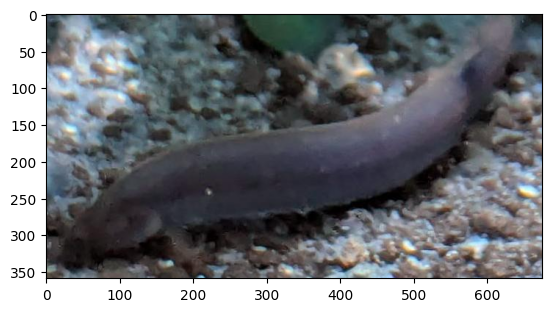

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Pangio_pangia): Corydoras_paleatus


In [46]:
img = cv2.imread('test_pictures/Pangio_pangia.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_pangia): {class_names[predicted_class]}')

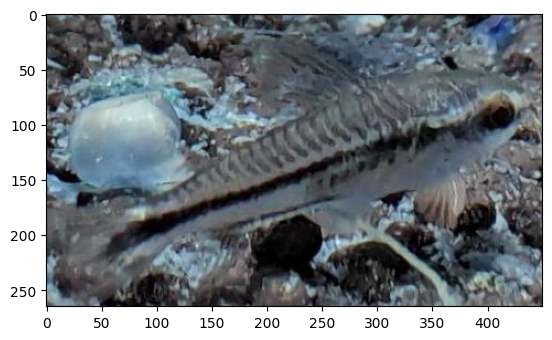

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Corydoras_pygmaeus): Trichogaster_trichopterus


In [47]:
img = cv2.imread('test_pictures/Corydoras_pygmaeus.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_pygmaeus): {class_names[predicted_class]}')

# Save the Model